In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data (1).csv')

# Вывести несколько первых строк таблицы данных
df.head()

Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2

Проверяем формат столбцов

In [14]:
df.shape

(301355, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [17]:
df['Дата'] = pd.to_datetime(df['Дата'])

df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [19]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [20]:
grouped_df.head()

Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055

Нарисуйте график продаж у `grouped_df`

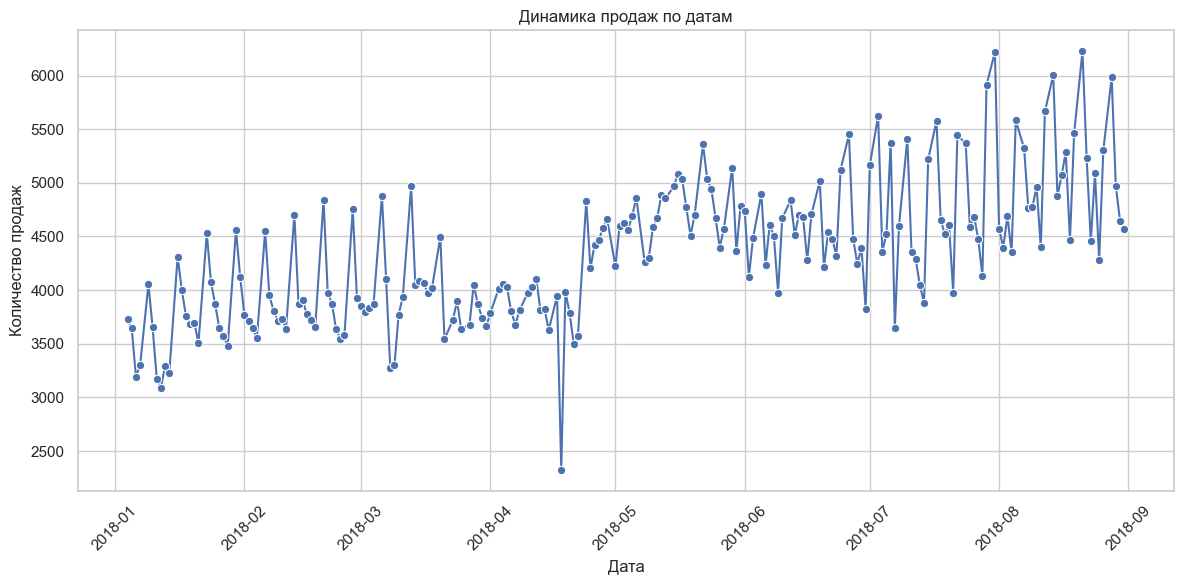

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=grouped_df, x='Дата', y='Количество', marker='o')
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)  # Поворот подписей по оси X для читаемости
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Продажи постепенно растут, в январе средние значения около 3500-4000 а к августу уже доходят до 5-6 тыс. Почти каждый день количество продаж сильно прыгает, но несмотря на это, кривая движется вверх. Апрель-май продажи немного проседают, даже есть резкое падение. С июня по август, начинается уверенный рост. Т.е в начале года, продажи были стабильны и не очень высокие. Весной они немного упали, но летом начался сильный рост, и к концу лета продажи стали заметно выше. При этом, почти каждый день были скачки, то вверх, то вниз. Но общая тенденция идёт в плюс

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [25]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[df['Количество'] > Q3 + 1.5 * IQR]
max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print("Строка с максимальным выбросом по количеству продаж:")
print(max_outlier)

Строка с максимальным выбросом по количеству продаж:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [26]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

df_склад3 = df[df['Склад'] == 3]
df_summer = df_склад3[df_склад3['Дата'].dt.month.isin([6,7,8])]
df_wednesday = df_summer[df_summer['Дата'].dt.weekday == 2]
top_products = df_wednesday.groupby('Номенклатура')['Количество'].sum().reset_index()
top_product = top_products.loc[top_products['Количество'].idxmax()]

print("Топовый товар по продажам по средам за июнь, июль, август на Складе 3:")
print(top_product)

Топовый товар по продажам по средам за июнь, июль, август на Складе 3:
Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [83]:
weather_df = pd.read_csv("weather.csv", encoding="cp1251", sep=';', skiprows=5)

weather_df = weather_df.iloc[:, :2]
weather_df.columns = ['Дата_время', 'T']

weather_df = weather_df.dropna(subset=['Дата_время', 'T'])

weather_df['Дата_время'] = pd.to_datetime(weather_df['Дата_время'], format='%d.%m.%Y %H:%M', errors='coerce')
weather_df['T'] = weather_df['T'].str.replace(',', '.').astype(float)
daily_temp = weather_df.groupby(weather_df['Дата_время'].dt.date)['T'].mean().reset_index()
daily_temp.rename(columns={'Дата_время': 'Дата'}, inplace=True)
daily_temp['Дата'] = pd.to_datetime(daily_temp['Дата'])

daily_temp

Дата        T
0  2025-08-01  19.1500
1  2025-08-02  19.1875
2  2025-08-03  17.4750
3  2025-08-04  15.0625
4  2025-08-05  17.1750
..        ...      ...
58 2025-09-28   7.2625
59 2025-09-29   1.8250
60 2025-09-30   1.6250
61 2025-10-01   2.8375
62 2025-10-02   5.1000

[63 rows x 2 columns]

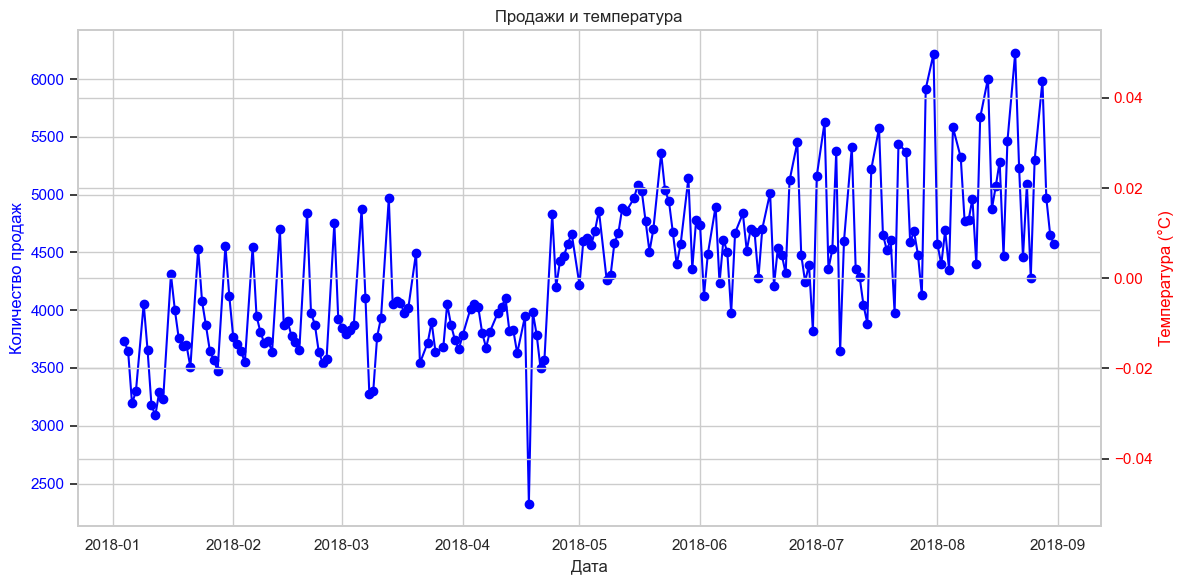

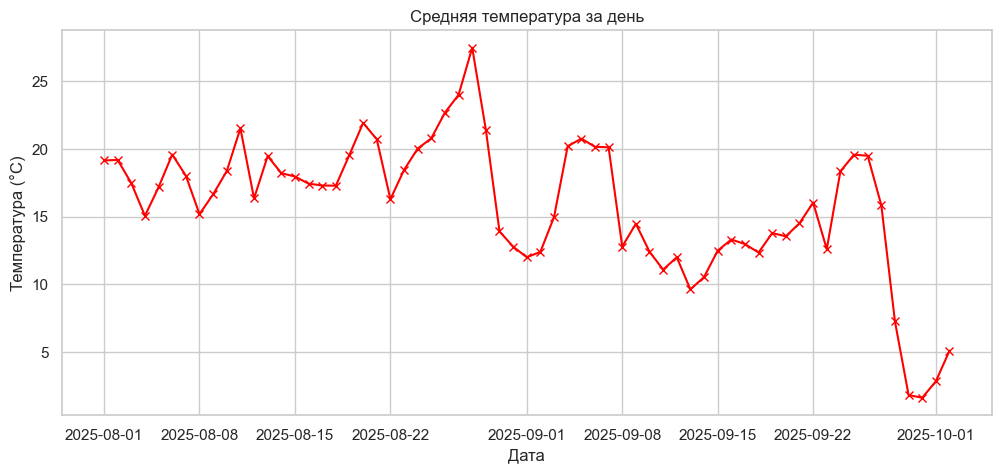

In [84]:
merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='left')

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='blue', marker='o', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], color='red', marker='x', label='Температура')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Продажи и температура')
fig.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(daily_temp['Дата'], daily_temp['T'], color='red', marker='x')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Средняя температура за день')
plt.grid(True)
plt.show()